# Assignment 1: Question 4

Consider the _911.csv_ dataset containing information about emergency calls received on the 911 emergency line in America.

The data contains the following variables:

| variable      | Description                                        |
|------------|----------------------------------------------------|
| lat        | Latitude                                           |
| lng        | Longitude                                          |
| desc       | Description of the Emergency Call                 |
| zip        | Zipcode                                            |
| title      | Title code                                              |
| timeStamp  | YYYY-MM-DD HH:MM:SS                                |
| twp        | Township                                           |
| addr       | Address                                            |
| e          | Dummy variable (always 1)                         |

In [2]:
import pandas as pd

In [3]:
# Specify the path to the dataset
file_path = "C:/Users/user/Documents/STK 353/Assignments/911.csv"
# Read the CSV file into a Pandas DataFrame
df = pd.read_csv(file_path)

1. Retrieve the first 7 rows of the dataset.

In [4]:
# Display the first 7 rows of the DataFrame
df.head(7)

,lat,lng,desc,zip,title,timeStamp,twp,addr,e
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1
5,40.253473,-75.283245,CANNON AVE & W 9TH ST; LANSDALE; Station 345;...,19446.0,EMS: HEAD INJURY,2015-12-10 17:40:01,LANSDALE,CANNON AVE & W 9TH ST,1
6,40.182111,-75.127795,LAUREL AVE & OAKDALE AVE; HORSHAM; Station 35...,19044.0,EMS: NAUSEA/VOMITING,2015-12-10 17:40:01,HORSHAM,LAUREL AVE & OAKDALE AVE,1


2. How many rows and columns does the dataset contain?

In [5]:
# Get the number of rows and columns in the dataset
num_rows, num_columns = df.shape

print("Number of rows:", num_rows)
print("Number of columns:", num_columns)

Number of rows: 99492
Number of columns: 9


3. How many columns contain missing data?

In [6]:
# Count missing values (NaN) in each column
missing_data_count = df.isna().sum()

# Find the number of columns with missing data
columns_with_missing_data = missing_data_count[missing_data_count > 0]

# Get the count of columns with missing data
num_columns_with_missing_data = len(columns_with_missing_data)

print("Number of columns with missing data:", num_columns_with_missing_data)


Number of columns with missing data: 3


4. Which 5 zipcodes have the most 911 calls?

In [7]:
# Count the number of 911 calls for each zip code and get the top 5
top_zipcodes = df['zip'].value_counts().head(5)

print("Top 5 zip codes with the most 911 calls:")
print(top_zipcodes)


Top 5 zip codes with the most 911 calls:
19401.0    6979
19464.0    6643
19403.0    4854
19446.0    4748
19406.0    3174
Name: zip, dtype: int64


5. Take a look at the 'title' column. How many unique title codes are there?

In [8]:
# Count the number of unique title codes in the 'title' column
num_unique_titles = df['title'].nunique()

print("Number of unique title codes:", num_unique_titles)


Number of unique title codes: 110


6. The title column gives information about the reason for the call. 

eg. 'EMS: BACK PAINS/INJURY' indicates that the _Reasons/Departments_ was EMS and the specific _Issue_ was BACK PAINS/INJURY.

All of the entries are formatted in this manner: **Reasons/Departments: Issue**

There are 3 possible _Reasons/Departments_: EMS, Fire, and Traffic and they are all indicated before the colon in the title code.

The obective is to create an new column called `Reason` that contains only the _Reasons/Departments_ information. ie. EMS, Fire, or Traffic.

a. Create function called `reason_extractor` that will select only the _Reasons/Departments_ from each title. 

Example: 'reason_extractor' must take in a string, eg. 'EMS: BACK PAINS/INJURY' and return only 'EMS'

(HINT: Consider the .split() method that is available for string variables.)

In [12]:
def reason_extractor(title):
    # Split the title using ':' as the delimiter and take the first part
    parts = title.split(':')
    if len(parts) > 0:
        return parts[0]
    else:
        return None  # Handle cases where the title format is unexpected

Test your function on 'Fire: GAS-ODOR/LEAK'. If you give it this string, does it output 'Fire'?

In [13]:
title_example = 'Fire: GAS-ODOR/LEAK'
reason = reason_extractor(title_example)
print("Reason extracted:", reason)

Reason extracted: Fire


b. Now use the .apply() method with a custom lambda expression to create a new column in your dataframe that is called "Reason" which contains the _Reasons/Departments_ information (ie. EMS, Fire, or Traffic only).

In [14]:
# Create a new column "Reason" by applying a lambda function to the "title" column
df['Reason'] = df['title'].apply(lambda x: x.split(':')[0])

# Display the first few rows of the DataFrame to verify the "Reason" column
print(df[['title', 'Reason']].head())


                     title Reason
0   EMS: BACK PAINS/INJURY    EMS
1  EMS: DIABETIC EMERGENCY    EMS
2      Fire: GAS-ODOR/LEAK   Fire
3   EMS: CARDIAC EMERGENCY    EMS
4           EMS: DIZZINESS    EMS


7.  How many calls were received for each _Reasons/Departments_ based off of the new "Reason" column?

In [15]:
# Count the number of calls for each Reasons/Departments based on the "Reason" column
reason_counts = df['Reason'].value_counts()

# Display the counts for each Reasons/Departments
print("Number of calls received for each Reasons/Departments:")
print(reason_counts)


Number of calls received for each Reasons/Departments:
EMS        48877
Traffic    35695
Fire       14920
Name: Reason, dtype: int64


8. Use `matplotlib` to plot a histogram showing the proportion of all the calls that were assigned to each _Reasons/Departments_. Remenber to give your graph a descriptive title and show all relevant labelling to ensure that your graph is meaningful and easy to understand. Also include gridlines in your plot for increased readability. 

In [18]:
import matplotlib.pyplot as plt

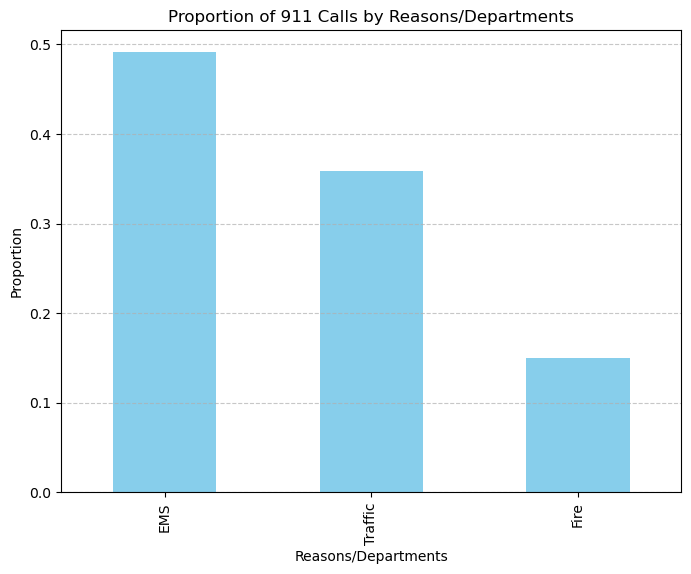

In [20]:
# Count the number of calls for each Reasons/Departments based on the "Reason" column
reason_counts = df['Reason'].value_counts()

# Calculate the proportions
total_calls = len(df)
proportions = reason_counts / total_calls

# Create a bar plot (histogram) for the proportions
plt.figure(figsize=(8, 6))
proportions.plot(kind='bar', color='skyblue')

# Add title and labels
plt.title('Proportion of 911 Calls by Reasons/Departments')
plt.xlabel('Reasons/Departments')
plt.ylabel('Proportion')

# Add gridlines for readability
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.show()



<h3><center>End of Question 4</center></h3>

<h2><center>End of Assignment 1</center></h2>